In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as path_effects


file_path = r"E:\Projects\Gamezone Orders Data\gamezone_orders_data_cleaned.csv"
df = pd.read_csv(
    file_path,
    parse_dates=['purchase_ts_cleaned', 'ship_ts'],
    dtype={
        'purchase_year': 'Int64',
        'purchase_month': 'Int64',
        'time_to_ship': 'Int64',
        'revenue': 'float'
    },
    encoding='utf-8',
    keep_default_na=False,
    na_values=['']  # Only treat empty strings as NaN
)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21864 entries, 0 to 21863
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   user_id                          21864 non-null  object        
 1   order_id                         21864 non-null  object        
 2   purchase_ts                      21864 non-null  object        
 3   purchase_ts_cleaned              21863 non-null  datetime64[ns]
 4   purchase_year                    21864 non-null  Int64         
 5   purchase_month                   21864 non-null  Int64         
 6   time_to_ship                     21864 non-null  Int64         
 7   ship_ts                          21864 non-null  datetime64[ns]
 8   product_name                     21864 non-null  object        
 9   product_name_cleaned             21864 non-null  object        
 10  product_id                       21864 non-null  object   

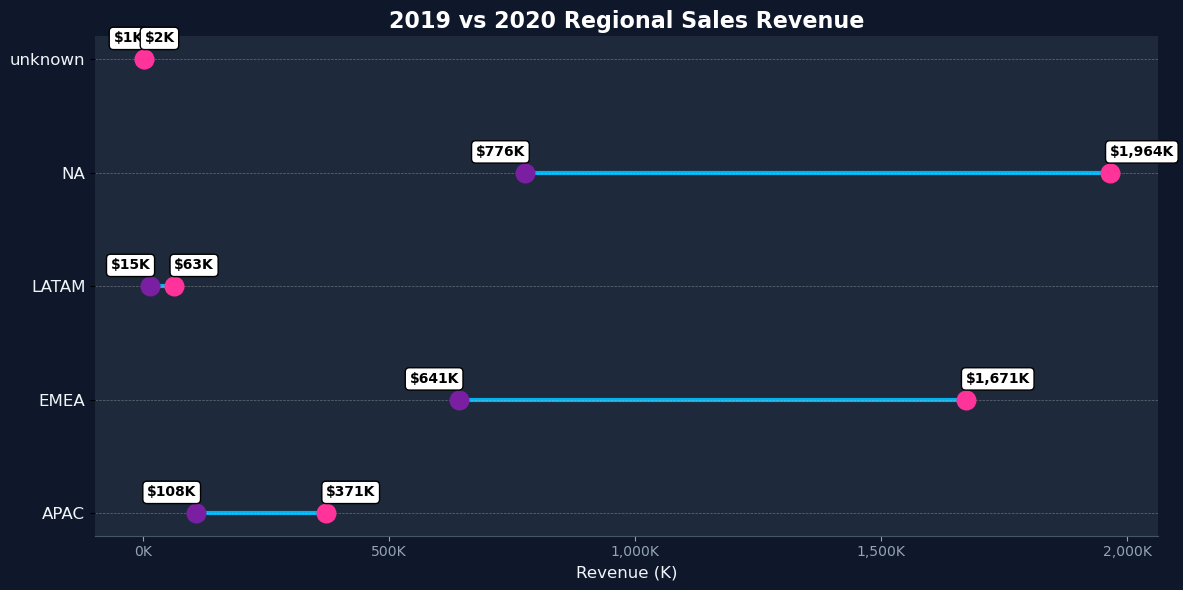

In [9]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# -------------------------
# 0. FIX PURCHASE_YEAR
# -------------------------
df['purchase_year'] = df['purchase_year'].astype(int)

# -------------------------
# 1. FILTER DATA
# -------------------------
df_filtered = df[df['purchase_year'].isin([2019, 2020])]

regional_revenue = (
    df_filtered
    .groupby(['region', 'purchase_year'])['revenue']
    .sum()
    .reset_index()
)

pivot = regional_revenue.pivot(
    index="region",
    columns="purchase_year",
    values="revenue"
).sort_index()

# -------------------------
# 2. COLORS & STYLE
# -------------------------
color_2019 = "#7B1FA2"   # Purple
color_2020 = "#FF3399"   # Hot Pink
line_color  = "#03b2ed"  # Cyan
text_light  = "#f1f5f9"  # Light slate
text_medium = "#94a3b8"  # Medium slate
bg_figure  = "#0f172a"   # Figure background
bg_plot    = "#1e293b"   # Plot area background

# -------------------------
# 3. FORMATTER
# -------------------------
def format_k(value):
    return f"{value/1000:,.0f}K"

# -------------------------
# 4. PLOT
# -------------------------
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor(bg_figure)
ax.set_facecolor(bg_plot)

regions = pivot.index.tolist()
y_positions = range(len(regions))

for i, region in enumerate(regions):
    v2019 = pivot.loc[region, 2019]
    v2020 = pivot.loc[region, 2020]

    # Connector line
    ax.plot([v2019, v2020], [i, i],
            color=line_color, linewidth=3, zorder=1)

    # 2019 dot
    ax.scatter(v2019, i, s=180, color=color_2019, zorder=3)
    ax.text(v2019, i + 0.12,
            "$" + format_k(v2019),
            ha='right', va='bottom', fontsize=10, color='black', weight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='black'))

    # 2020 dot
    ax.scatter(v2020, i, s=180, color=color_2020, zorder=3)
    ax.text(v2020, i + 0.12,
            "$" + format_k(v2020),
            ha='left', va='bottom', fontsize=10, color='black', weight='bold',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor='black'))

# -------------------------
# 5. STYLE + AXES + GRID
# -------------------------
ax.set_yticks(y_positions)
ax.set_yticklabels(regions, fontsize=12, color=text_light)
ax.set_xlabel("Revenue (K)", fontsize=12, color=text_light)
ax.set_title("2019 vs 2020 Regional Sales Revenue", fontsize=16, weight='bold', color='white')

# Horizontal gridlines
ax.grid(axis='y', color='lightgray', linestyle='--', linewidth=0.5, alpha=0.4)

# X-axis formatting
ax.xaxis.set_major_locator(ticker.MultipleLocator(500_000))
ax.xaxis.set_major_formatter(lambda x, pos: f"{x/1000:,.0f}K")
ax.tick_params(axis='x', colors=text_medium)

# Subtle bottom border
ax.spines['bottom'].set_color("#475569")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
plt.show()


In [5]:
region_performance = (
    df.groupby('region')
    .agg(
        total_revenue=('revenue', 'sum'),
        total_orders=('order_id', 'nunique'),
        unique_customers=('user_id', 'nunique')
    )
    .reset_index()
)

region_performance

,region,total_revenue,total_orders,unique_customers
0,APAC,531226.11,1570,1430
1,EMEA,2562575.68,9454,8640
2,LATAM,85841.40,386,356
3,NA,2968096.26,10265,9388
4,unknown,3527.04,42,37


In [6]:
region_performance.to_csv('region _performance.csv', index=False)

In [13]:
# Aggregate data by country
country_summary = df.groupby('country_code').agg(
    total_revenue=('revenue', 'sum'),
    total_orders=('order_id', 'nunique'),
    unique_customers=('user_id', 'nunique')
)

# Sort by total revenue descending
top5_countries = country_summary.sort_values('total_revenue', ascending=False).head(5)

# Optional: format numbers nicely
top5_countries['total_revenue'] = top5_countries['total_revenue'].map('${:,.0f}'.format)

top5_countries.reset_index()


,country_code,total_revenue,total_orders,unique_customers
0,US,"$2,955,813",10230,9355
1,GB,"$475,395",1794,1644
2,DE,"$255,805",845,774
3,CA,"$233,775",946,850
4,JP,"$220,628",517,461


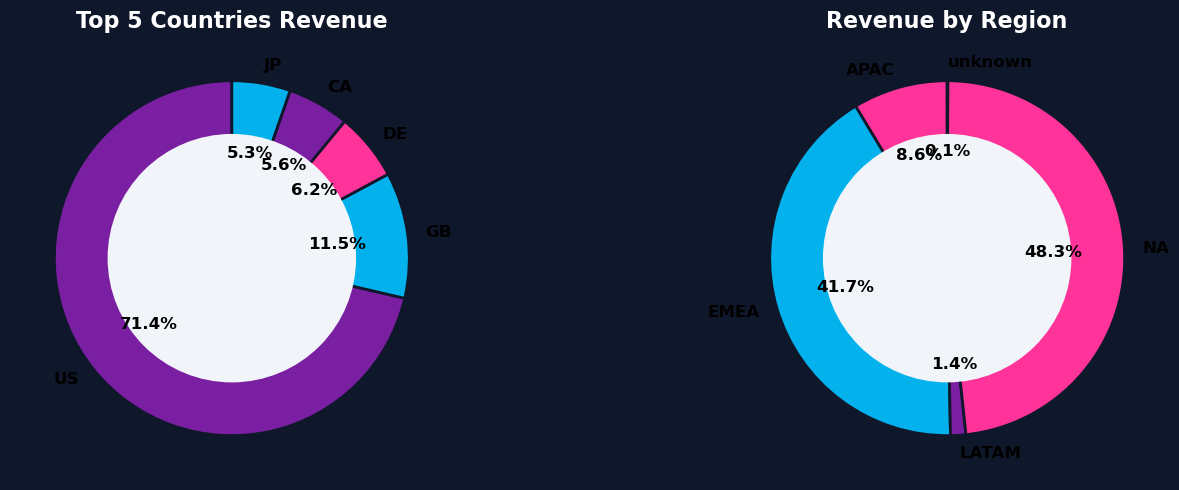

In [16]:
import matplotlib.pyplot as plt

# -------------------------
# 1. DATA
# -------------------------
countries = ['US', 'GB', 'DE', 'CA', 'JP']
country_revenue = [2955813, 475395, 255805, 233775, 220628]

regions = ['APAC', 'EMEA', 'LATAM', 'NA', 'unknown']
region_revenue = [531226.11, 2562575.68, 85841.40, 2968096.26, 3527.04]

# Colors (gradient-inspired)
colors_countries = ['#7B1FA2', '#03b2ed', '#FF3399', '#7B1FA2', '#03b2ed']
colors_regions = ['#FF3399', '#03b2ed', '#7B1FA2', '#FF3399', '#03b2ed']

# -------------------------
# 2. PLOT
# -------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 5), facecolor='#0f172a')

# Donut chart - Top Countries
axes[0].pie(country_revenue,
            labels=countries,
            autopct='%1.1f%%',
            startangle=90,
            colors=colors_countries,
            textprops={'color': '#000000', 'fontsize': 12, 'weight': 'bold'},
            wedgeprops={'edgecolor': '#0f172a', 'linewidth': 2})
# Draw circle in the middle for donut
centre_circle_c = plt.Circle((0,0),0.70,fc='#f1f5f9')
axes[0].add_artist(centre_circle_c)
axes[0].set_title("Top 5 Countries Revenue", fontsize=16, weight='bold', color='white')

# Donut chart - Regions
axes[1].pie(region_revenue,
            labels=regions,
            autopct='%1.1f%%',
            startangle=90,
            colors=colors_regions,
            textprops={'color': '#000000', 'fontsize': 12, 'weight': 'bold'},
            wedgeprops={'edgecolor': '#0f172a', 'linewidth': 2})
# Draw circle in the middle for donut
centre_circle_r = plt.Circle((0,0),0.70,fc='#f1f5f9')
axes[1].add_artist(centre_circle_r)
axes[1].set_title("Revenue by Region", fontsize=16, weight='bold', color='white')

# -------------------------
# 3. FINAL TOUCHES
# -------------------------
plt.tight_layout()
plt.show()


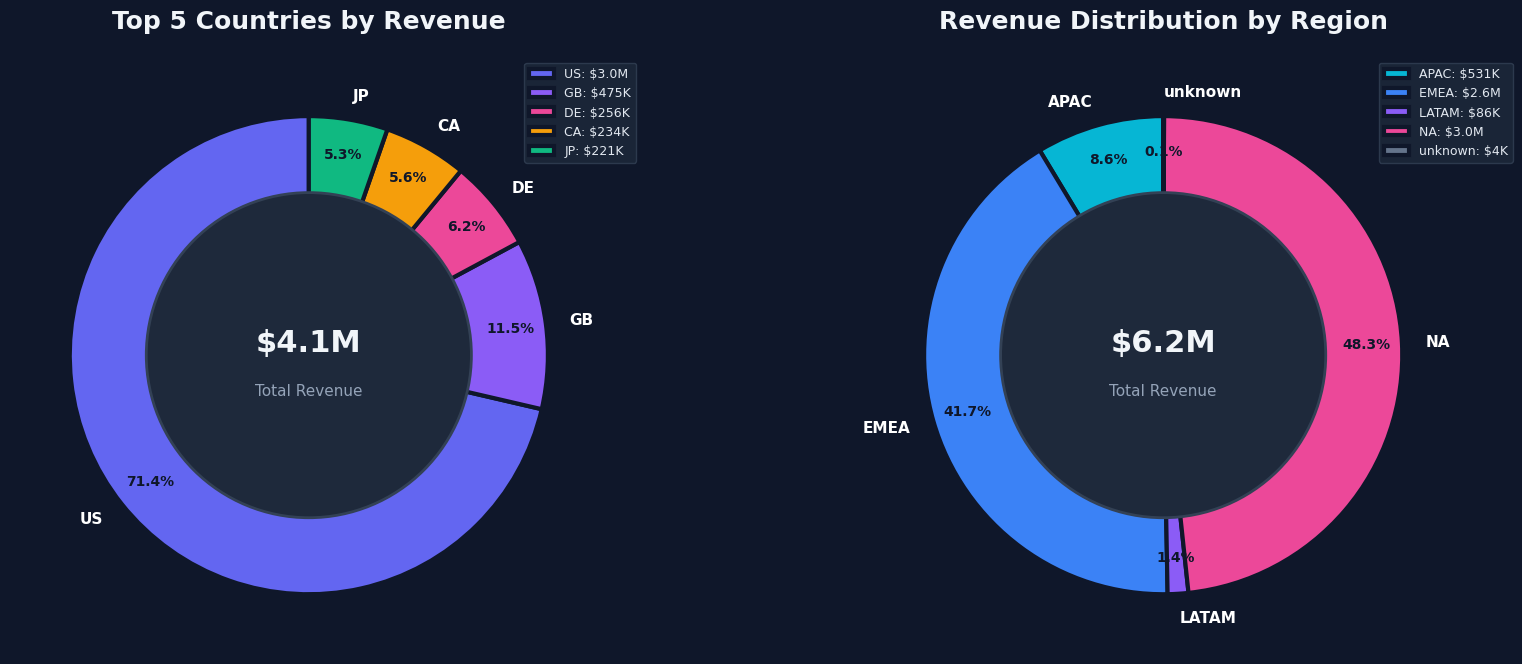

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# 1. DATA
# -------------------------
countries = ['US', 'GB', 'DE', 'CA', 'JP']
country_revenue = [2955813, 475395, 255805, 233775, 220628]

regions = ['APAC', 'EMEA', 'LATAM', 'NA', 'unknown']
region_revenue = [531226.11, 2562575.68, 85841.40, 2968096.26, 3527.04]

# Enhanced color palettes (vibrant, professional gradients)
colors_countries = ['#6366F1', '#8B5CF6', '#EC4899', '#F59E0B', '#10B981']
colors_regions = ['#06B6D4', '#3B82F6', '#8B5CF6', '#EC4899', '#64748B']

# -------------------------
# 2. ENHANCED PLOT
# -------------------------
fig, axes = plt.subplots(1, 2, figsize=(18, 7), facecolor='#0f172a')

# Function to format large numbers
def format_currency(value):
    if value >= 1_000_000:
        return f'${value/1_000_000:.1f}M'
    elif value >= 1_000:
        return f'${value/1_000:.0f}K'
    return f'${value:.0f}'

# --- LEFT: Top Countries Donut Chart ---
wedges1, texts1, autotexts1 = axes[0].pie(
    country_revenue,
    labels=countries,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_countries,
    textprops={'color': 'white', 'fontsize': 11, 'weight': 'bold'},
    wedgeprops={'edgecolor': '#0f172a', 'linewidth': 3, 'antialiased': True},
    pctdistance=0.85
)

# Style percentage labels to be more visible
for autotext in autotexts1:
    autotext.set_color('#0f172a')
    autotext.set_fontsize(10)
    autotext.set_weight('bold')

# Enhanced donut hole with gradient effect
centre_circle_c = plt.Circle((0, 0), 0.68, fc='#1e293b', ec='#334155', linewidth=2)
axes[0].add_artist(centre_circle_c)

# Add center text showing total
total_country = sum(country_revenue)
axes[0].text(0, 0.05, format_currency(total_country), 
             ha='center', va='center', fontsize=22, weight='bold', color='#f1f5f9')
axes[0].text(0, -0.15, 'Total Revenue', 
             ha='center', va='center', fontsize=11, color='#94a3b8')

axes[0].set_title("Top 5 Countries by Revenue", fontsize=18, weight='bold', 
                  color='#f1f5f9', pad=20)

# --- RIGHT: Regions Donut Chart ---
wedges2, texts2, autotexts2 = axes[1].pie(
    region_revenue,
    labels=regions,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_regions,
    textprops={'color': 'white', 'fontsize': 11, 'weight': 'bold'},
    wedgeprops={'edgecolor': '#0f172a', 'linewidth': 3, 'antialiased': True},
    pctdistance=0.85
)

# Style percentage labels
for autotext in autotexts2:
    autotext.set_color('#0f172a')
    autotext.set_fontsize(10)
    autotext.set_weight('bold')

# Enhanced donut hole
centre_circle_r = plt.Circle((0, 0), 0.68, fc='#1e293b', ec='#334155', linewidth=2)
axes[1].add_artist(centre_circle_r)

# Add center text showing total
total_region = sum(region_revenue)
axes[1].text(0, 0.05, format_currency(total_region), 
             ha='center', va='center', fontsize=22, weight='bold', color='#f1f5f9')
axes[1].text(0, -0.15, 'Total Revenue', 
             ha='center', va='center', fontsize=11, color='#94a3b8')

axes[1].set_title("Revenue Distribution by Region", fontsize=18, weight='bold', 
                  color='#f1f5f9', pad=20)

# -------------------------
# 3. LEGEND & FINAL TOUCHES
# -------------------------
# Add custom legends with revenue values
legend_labels_countries = [f'{c}: {format_currency(r)}' 
                           for c, r in zip(countries, country_revenue)]
legend_labels_regions = [f'{r}: {format_currency(rev)}' 
                         for r, rev in zip(regions, region_revenue)]

axes[0].legend(legend_labels_countries, loc='upper left', bbox_to_anchor=(0.85, 1),
               fontsize=9, frameon=True, facecolor='#1e293b', edgecolor='#334155',
               labelcolor='#e2e8f0')

axes[1].legend(legend_labels_regions, loc='upper left', bbox_to_anchor=(0.85, 1),
               fontsize=9, frameon=True, facecolor='#1e293b', edgecolor='#334155',
               labelcolor='#e2e8f0')

plt.tight_layout(pad=2)
plt.show()

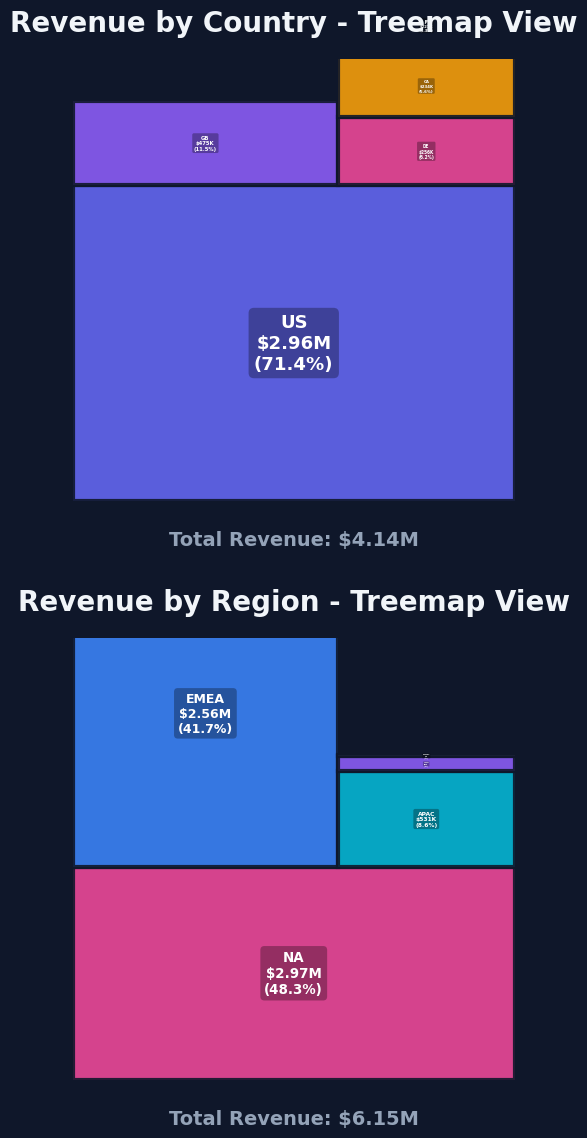

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# -------------------------
# 1. DATA
# -------------------------
countries = ['US', 'GB', 'DE', 'CA', 'JP']
country_revenue = [2955813, 475395, 255805, 233775, 220628]

regions = ['APAC', 'EMEA', 'LATAM', 'NA', 'Unknown']
region_revenue = [531226.11, 2562575.68, 85841.40, 2968096.26, 3527.04]

# Vibrant color palette
colors_countries = ['#6366F1', '#8B5CF6', '#EC4899', '#F59E0B', '#10B981']
colors_regions = ['#06B6D4', '#3B82F6', '#8B5CF6', '#EC4899', '#64748B']

# -------------------------
# 2. HELPER FUNCTIONS
# -------------------------
def format_currency(value):
    if value >= 1_000_000:
        return f'${value/1_000_000:.2f}M'
    elif value >= 1_000:
        return f'${value/1_000:.0f}K'
    return f'${value:.0f}'

def simple_treemap(ax, sizes, labels, colors, title):
    """Create a simple treemap using rectangles"""
    total = sum(sizes)
    
    # Sort by size (largest first)
    sorted_data = sorted(zip(sizes, labels, colors), reverse=True, key=lambda x: x[0])
    sizes_sorted, labels_sorted, colors_sorted = zip(*sorted_data)
    
    # Calculate positions for rectangles
    rects = []
    x, y = 0, 0
    width, height = 10, 10
    
    for i, size in enumerate(sizes_sorted):
        proportion = size / total
        rect_area = proportion * (width * height)
        
        # Simple layout: fill horizontally then move down
        if i == 0:
            # Largest gets full width
            rect_width = width
            rect_height = rect_area / rect_width
        elif i == 1:
            # Second largest
            rect_width = width * 0.6
            rect_height = rect_area / rect_width
            x = 0
            y = rects[0]['height']
        else:
            # Smaller ones stack
            remaining_width = width - rects[1]['width'] if i == 2 else rects[i-1]['width']
            rect_width = remaining_width
            rect_height = rect_area / rect_width if rect_width > 0 else 1
            
            if i == 2:
                x = rects[1]['width']
                y = rects[0]['height']
            else:
                x = rects[i-1]['x']
                y = rects[i-1]['y'] + rects[i-1]['height']
        
        rects.append({
            'x': x, 'y': y, 'width': rect_width, 'height': rect_height,
            'size': size, 'label': labels_sorted[i], 'color': colors_sorted[i]
        })
    
    # Draw rectangles
    for rect in rects:
        rectangle = mpatches.Rectangle(
            (rect['x'], rect['y']), rect['width'], rect['height'],
            facecolor=rect['color'], edgecolor='#0f172a', linewidth=3, alpha=0.9
        )
        ax.add_patch(rectangle)
        
        # Add text
        pct = (rect['size'] / total) * 100
        text = f"{rect['label']}\n{format_currency(rect['size'])}\n({pct:.1f}%)"
        
        # Center text in rectangle
        cx = rect['x'] + rect['width'] / 2
        cy = rect['y'] + rect['height'] / 2
        
        # Adjust font size based on rectangle size
        fontsize = min(13, rect['width'] * 1.5, rect['height'] * 2)
        
        ax.text(cx, cy, text, ha='center', va='center',
                fontsize=fontsize, weight='bold', color='white',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='black', alpha=0.3, edgecolor='none'))
    
    ax.set_xlim(0, width)
    ax.set_ylim(0, height)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title(title, fontsize=20, weight='bold', color='#f1f5f9', pad=20)

# -------------------------
# 3. CREATE TREEMAPS
# -------------------------
fig, axes = plt.subplots(2, 1, figsize=(18, 12), facecolor='#0f172a')

# Countries treemap
simple_treemap(axes[0], country_revenue, countries, colors_countries, 
               'Revenue by Country - Treemap View')

total_countries = sum(country_revenue)
axes[0].text(5, -1, f'Total Revenue: {format_currency(total_countries)}',
             ha='center', fontsize=14, weight='bold', color='#94a3b8')

# Regions treemap
simple_treemap(axes[1], region_revenue, regions, colors_regions,
               'Revenue by Region - Treemap View')

total_regions = sum(region_revenue)
axes[1].text(5, -1, f'Total Revenue: {format_currency(total_regions)}',
             ha='center', fontsize=14, weight='bold', color='#94a3b8')

# -------------------------
# 4. FINAL TOUCHES
# -------------------------
plt.tight_layout(pad=3)
plt.show()

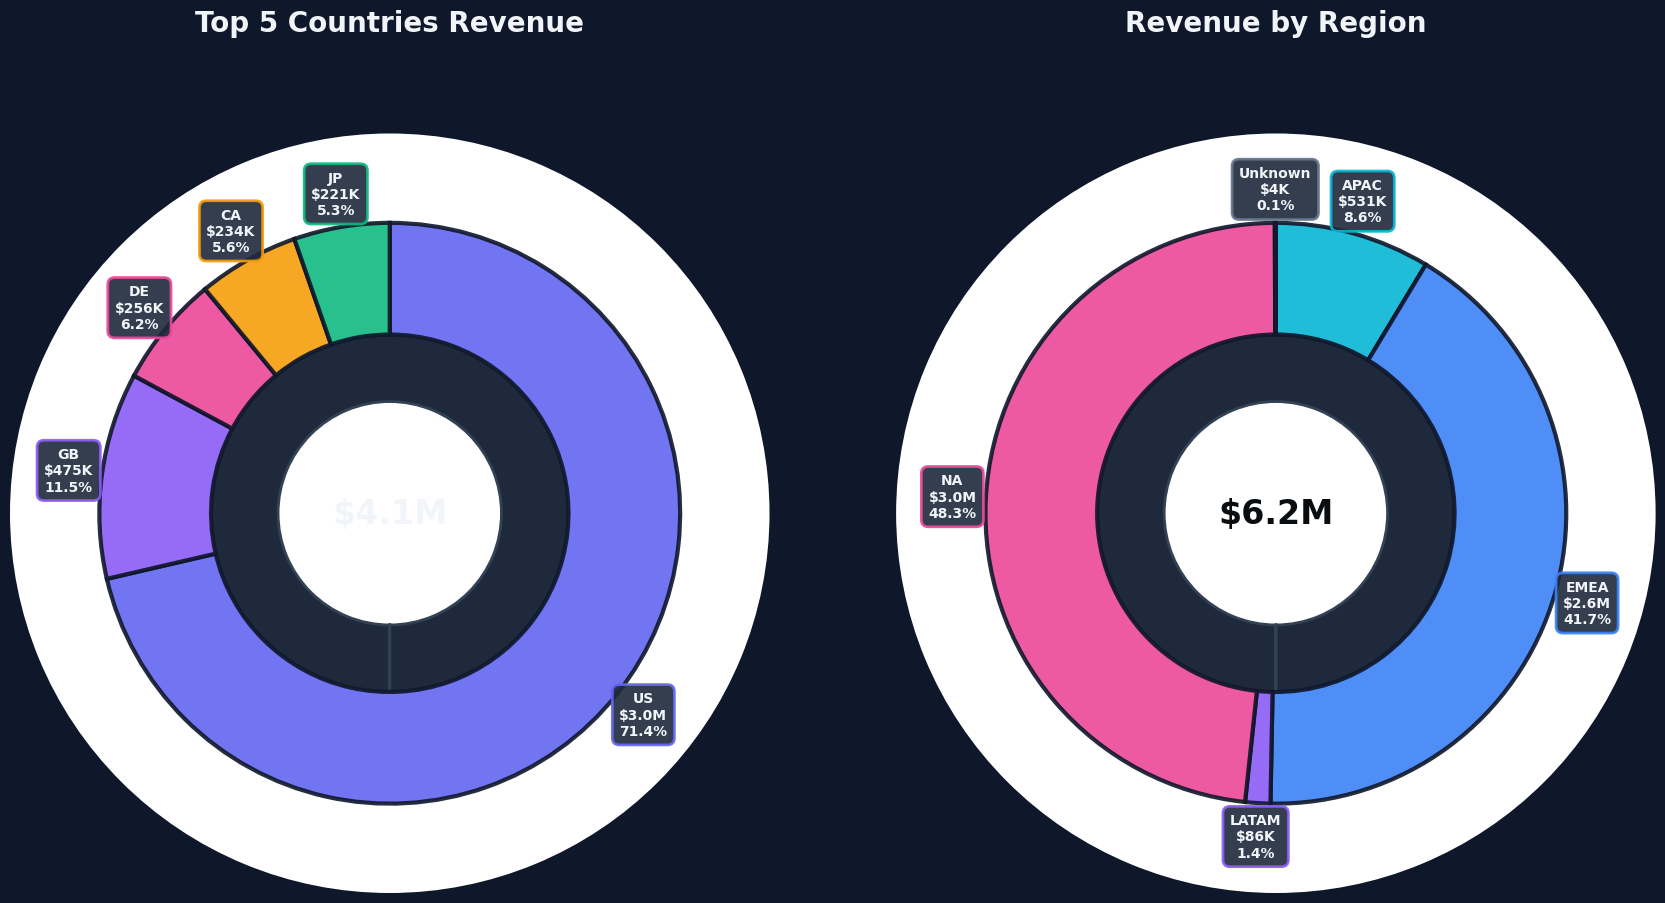

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# 1. DATA
# -------------------------
countries = ['US', 'GB', 'DE', 'CA', 'JP']
country_revenue = [2955813, 475395, 255805, 233775, 220628]

regions = ['APAC', 'EMEA', 'LATAM', 'NA', 'Unknown']
region_revenue = [531226.11, 2562575.68, 85841.40, 2968096.26, 3527.04]

# Vibrant color palette
colors_countries = ['#6366F1', '#8B5CF6', '#EC4899', '#F59E0B', '#10B981']
colors_regions = ['#06B6D4', '#3B82F6', '#8B5CF6', '#EC4899', '#64748B']

# -------------------------
# 2. HELPER FUNCTIONS
# -------------------------
def format_currency(value):
    if value >= 1_000_000:
        return f'${value/1_000_000:.1f}M'
    elif value >= 1_000:
        return f'${value/1_000:.0f}K'
    return f'${value:.0f}'

# -------------------------
# 3. CREATE SUNBURST CHARTS
# -------------------------
fig, axes = plt.subplots(1, 2, figsize=(18, 9), facecolor='#0f172a', subplot_kw=dict(projection='polar'))

# --- LEFT: Countries Sunburst ---
ax1 = axes[0]

# Calculate sizes and angles
total_country = sum(country_revenue)
country_sizes = [rev / total_country for rev in country_revenue]
country_angles = np.cumsum([0] + country_sizes) * 2 * np.pi

# Inner ring - solid color showing total
inner_bars = ax1.bar(x=0, width=2*np.pi, bottom=0.5, height=0.3,
                     color='#1e293b', edgecolor='#334155', linewidth=2)

# Outer ring - countries
for i in range(len(countries)):
    theta1 = country_angles[i]
    theta2 = country_angles[i + 1]
    theta_mid = (theta1 + theta2) / 2
    width = theta2 - theta1
    
    # Draw segment
    ax1.bar(x=theta_mid, width=width, bottom=0.8, height=0.5,
            color=colors_countries[i], edgecolor='#0f172a', 
            linewidth=3, alpha=0.9, align='center')
    
    # Add labels on outer edge
    pct = country_sizes[i] * 100
    label_radius = 1.45
    label_x = theta_mid
    label_text = f'{countries[i]}\n{format_currency(country_revenue[i])}\n{pct:.1f}%'
    
    ax1.text(label_x, label_radius, label_text,
             ha='center', va='center', fontsize=10, weight='bold', color='#f1f5f9',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='#1e293b', 
                      edgecolor=colors_countries[i], linewidth=2, alpha=0.9))

# Center text
ax1.text(0, 0, format_currency(total_country),
         ha='center', va='center', fontsize=24, weight='bold', color='#f1f5f9')
ax1.text(0, -0.2, 'Total Revenue',
         ha='center', va='center', fontsize=11, color='#94a3b8')

# Styling
ax1.set_ylim(0, 1.7)
ax1.set_theta_zero_location('N')
ax1.set_theta_direction(-1)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.spines['polar'].set_visible(False)
ax1.set_title('Top 5 Countries Revenue', fontsize=20, weight='bold', 
              color='#f1f5f9', pad=30, y=1.08)

# --- RIGHT: Regions Sunburst ---
ax2 = axes[1]

# Calculate sizes and angles
total_region = sum(region_revenue)
region_sizes = [rev / total_region for rev in region_revenue]
region_angles = np.cumsum([0] + region_sizes) * 2 * np.pi

# Inner ring
inner_bars2 = ax2.bar(x=0, width=2*np.pi, bottom=0.5, height=0.3,
                      color='#1e293b', edgecolor='#334155', linewidth=2)

# Outer ring - regions
for i in range(len(regions)):
    theta1 = region_angles[i]
    theta2 = region_angles[i + 1]
    theta_mid = (theta1 + theta2) / 2
    width = theta2 - theta1
    
    # Draw segment
    ax2.bar(x=theta_mid, width=width, bottom=0.8, height=0.5,
            color=colors_regions[i], edgecolor='#0f172a', 
            linewidth=3, alpha=0.9, align='center')
    
    # Add labels
    pct = region_sizes[i] * 100
    label_radius = 1.45
    label_x = theta_mid
    label_text = f'{regions[i]}\n{format_currency(region_revenue[i])}\n{pct:.1f}%'
    
    ax2.text(label_x, label_radius, label_text,
             ha='center', va='center', fontsize=10, weight='bold', color='#f1f5f9',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='#1e293b', 
                      edgecolor=colors_regions[i], linewidth=2, alpha=0.9))

# Center text
ax2.text(0, 0, format_currency(total_region),
         ha='center', va='center', fontsize=24, weight='bold', color="#0a0d10")
ax2.text(0, -0.2, 'Total Revenue',
         ha='center', va='center', fontsize=11, color="#060606")

# Styling
ax2.set_ylim(0, 1.7)
ax2.set_theta_zero_location('N')
ax2.set_theta_direction(-1)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.spines['polar'].set_visible(False)
ax2.set_title('Revenue by Region', fontsize=20, weight='bold', 
              color='#f1f5f9', pad=30, y=1.08)

# -------------------------
# 4. FINAL TOUCHES
# -------------------------
plt.tight_layout(pad=2)
plt.show()

C:\Users\shaif\AppData\Local\Temp\ipykernel_300\2153393842.py:84: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(pad=2)


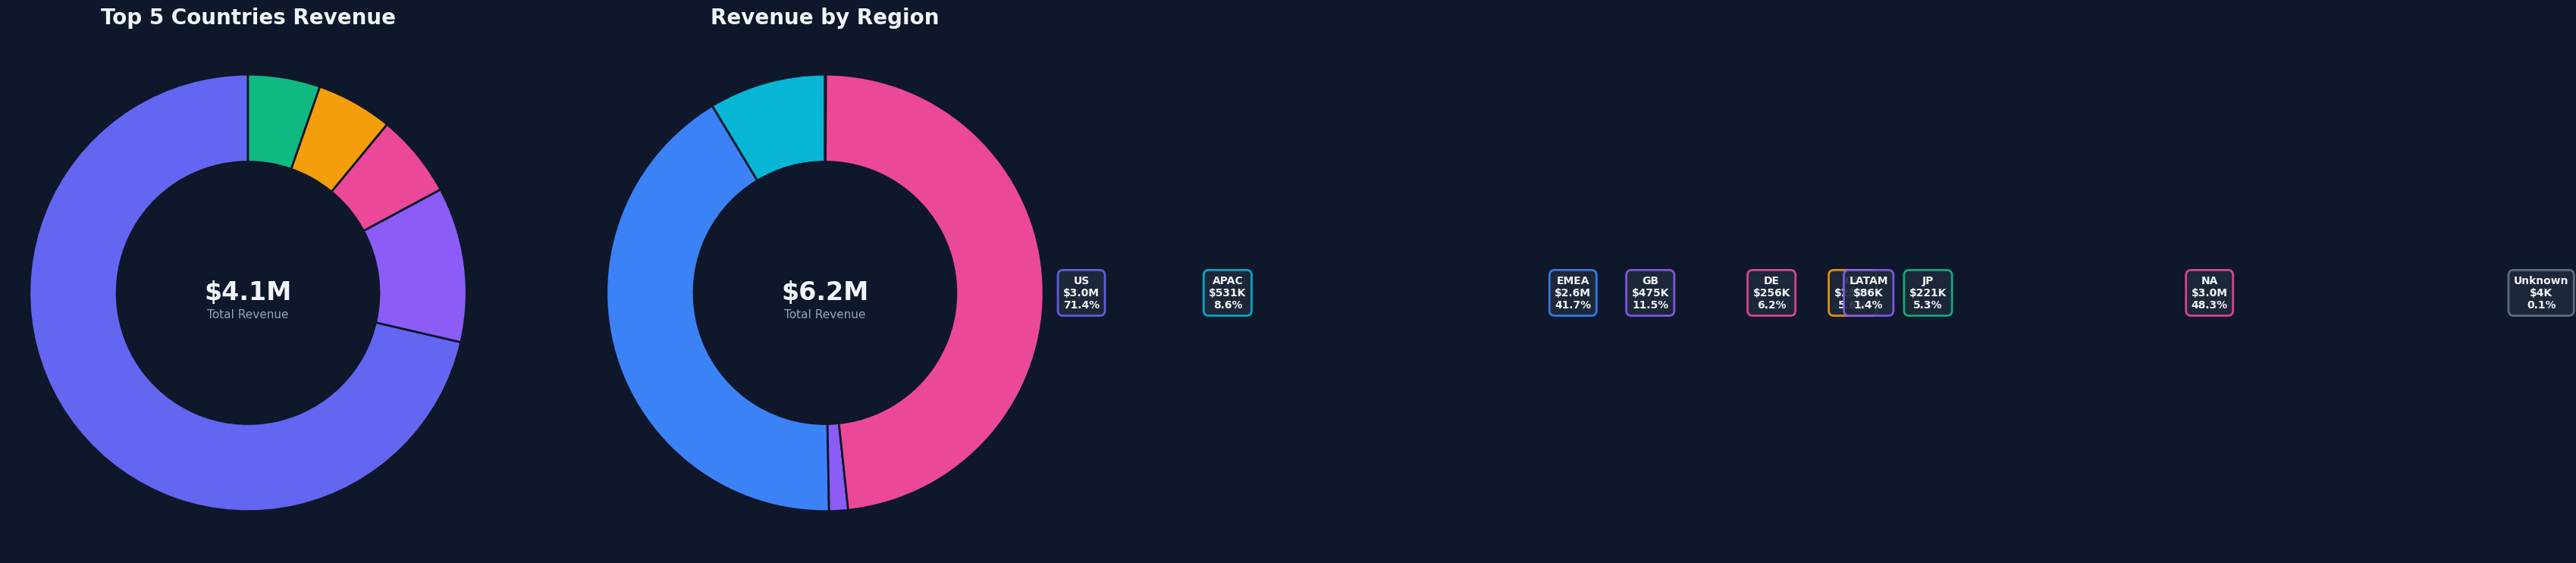

In [23]:
import matplotlib.pyplot as plt

# -------------------------
# 1. DATA
# -------------------------
countries = ['US', 'GB', 'DE', 'CA', 'JP']
country_revenue = [2955813, 475395, 255805, 233775, 220628]

regions = ['APAC', 'EMEA', 'LATAM', 'NA', 'Unknown']
region_revenue = [531226.11, 2562575.68, 85841.40, 2968096.26, 3527.04]

# Colours and background
colors_countries = ['#6366F1', '#8B5CF6', '#EC4899', '#F59E0B', '#10B981']
colors_regions = ['#06B6D4', '#3B82F6', '#8B5CF6', '#EC4899', '#64748B']
bg_color = '#0f172a'
label_bg = '#1e293b'
label_edge_alpha = 0.9

# -------------------------
# 2. HELPER FUNCTION
# -------------------------
def format_currency(value):
    if value >= 1_000_000:
        return f'${value/1_000_000:.1f}M'
    elif value >= 1_000:
        return f'${value/1_000:.0f}K'
    return f'${value:.0f}'

# -------------------------
# 3. CREATE DONUT CHARTS
# -------------------------
fig, axes = plt.subplots(1, 2, figsize=(18, 9), facecolor=bg_color)

# --- LEFT: Countries ---
ax1 = axes[0]
wedges1, texts1, autotexts1 = ax1.pie(
    country_revenue, labels=None, autopct='', startangle=90, colors=colors_countries,
    wedgeprops=dict(width=0.4, edgecolor=bg_color, linewidth=2)
)

# Add labels manually
total_country = sum(country_revenue)
for i, w in enumerate(wedges1):
    pct = country_revenue[i] / total_country * 100
    ax1.text(w.theta2/2 * 3.14159/180 + w.theta1/2 * 3.14159/180, 0,  # center-ish
             f"{countries[i]}\n{format_currency(country_revenue[i])}\n{pct:.1f}%",
             ha='center', va='center', fontsize=10, weight='bold', color='#f1f5f9',
             bbox=dict(boxstyle='round,pad=0.5', facecolor=label_bg,
                       edgecolor=colors_countries[i], linewidth=2, alpha=label_edge_alpha)
            )

ax1.set_title('Top 5 Countries Revenue', fontsize=20, weight='bold', color='#f1f5f9')
ax1.text(0, 0, format_currency(total_country), ha='center', va='center',
         fontsize=24, weight='bold', color='#f1f5f9')
ax1.text(0, -0.1, 'Total Revenue', ha='center', va='center',
         fontsize=11, color='#94a3b8')
ax1.axis('equal')

# --- RIGHT: Regions ---
ax2 = axes[1]
wedges2, texts2, autotexts2 = ax2.pie(
    region_revenue, labels=None, autopct='', startangle=90, colors=colors_regions,
    wedgeprops=dict(width=0.4, edgecolor=bg_color, linewidth=2)
)

# Add labels manually
total_region = sum(region_revenue)
for i, w in enumerate(wedges2):
    pct = region_revenue[i] / total_region * 100
    ax2.text(w.theta2/2 * 3.14159/180 + w.theta1/2 * 3.14159/180, 0,
             f"{regions[i]}\n{format_currency(region_revenue[i])}\n{pct:.1f}%",
             ha='center', va='center', fontsize=10, weight='bold', color='#f1f5f9',
             bbox=dict(boxstyle='round,pad=0.5', facecolor=label_bg,
                       edgecolor=colors_regions[i], linewidth=2, alpha=label_edge_alpha)
            )

ax2.set_title('Revenue by Region', fontsize=20, weight='bold', color='#f1f5f9')
ax2.text(0, 0, format_currency(total_region), ha='center', va='center',
         fontsize=24, weight='bold', color='#f1f5f9')
ax2.text(0, -0.1, 'Total Revenue', ha='center', va='center',
         fontsize=11, color='#94a3b8')
ax2.axis('equal')

plt.tight_layout(pad=2)
plt.show()


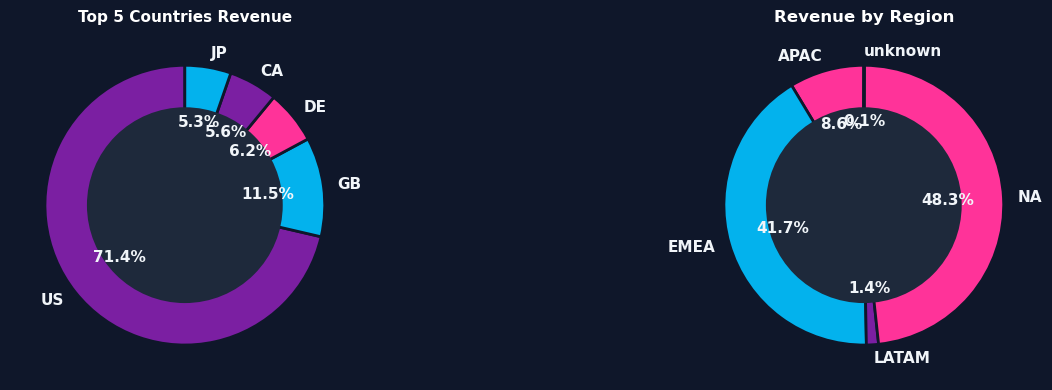

In [28]:
import matplotlib.pyplot as plt

# -------------------------
# 1. DATA
# -------------------------
countries = ['US', 'GB', 'DE', 'CA', 'JP']
country_revenue = [2955813, 475395, 255805, 233775, 220628]

regions = ['APAC', 'EMEA', 'LATAM', 'NA', 'unknown']
region_revenue = [531226.11, 2562575.68, 85841.40, 2968096.26, 3527.04]

# Colors (gradient-inspired)
colors_countries = ['#7B1FA2', '#03b2ed', '#FF3399', '#7B1FA2', '#03b2ed']
colors_regions = ['#FF3399', '#03b2ed', '#7B1FA2', '#FF3399', '#03b2ed']

# -------------------------
# 2. PLOT
# -------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 4), facecolor='#0f172a')
for ax in axes:
    ax.set_facecolor('#1e293b')

# Donut chart - Top Countries
wedges_c, texts_c, autotexts_c = axes[0].pie(
    country_revenue,
    labels=countries,
    autopct=lambda p: f'{p:.1f}%',
    startangle=90,
    colors=colors_countries,
    wedgeprops={'edgecolor': '#0f172a', 'linewidth': 2},
    textprops={'fontsize': 11, 'weight': 'bold', 'color': '#f1f5f9'}
)
centre_circle_c = plt.Circle((0,0),0.70,fc='#1e293b')
axes[0].add_artist(centre_circle_c)
axes[0].set_title("Top 5 Countries Revenue", fontsize=11, weight='bold', color='white')

# Donut chart - Regions
wedges_r, texts_r, autotexts_r = axes[1].pie(
    region_revenue,
    labels=regions,
    autopct=lambda p: f'{p:.1f}%',
    startangle=90,
    colors=colors_regions,
    wedgeprops={'edgecolor': '#0f172a', 'linewidth': 2},
    textprops={'fontsize': 11, 'weight': 'bold', 'color': '#f1f5f9'}
)
centre_circle_r = plt.Circle((0,0),0.70,fc='#1e293b')
axes[1].add_artist(centre_circle_r)
axes[1].set_title("Revenue by Region", fontsize=12, weight='bold', color='white')

# -------------------------
# 3. STYLE + LABELS
# -------------------------
for autotext in autotexts_c + autotexts_r:
    autotext.set_color('#f1f5f9')  # light slate
    autotext.set_weight('bold')
    autotext.set_fontsize(11)

plt.tight_layout()
plt.show()


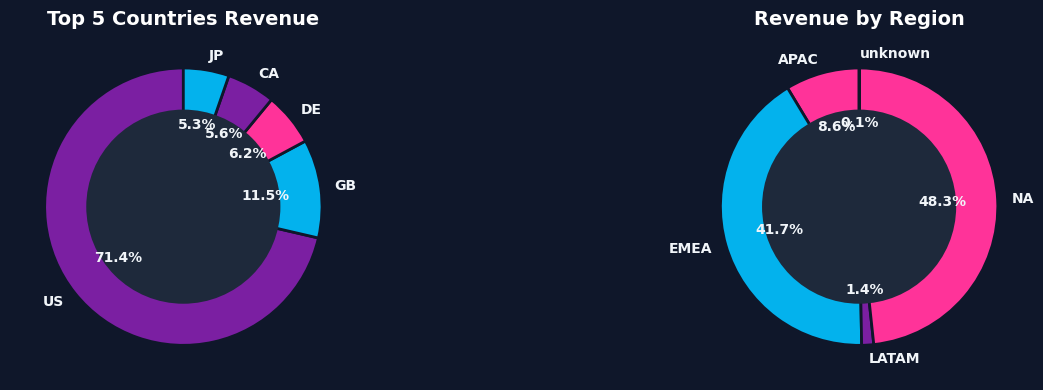

In [29]:
import matplotlib.pyplot as plt

# -------------------------
# 1. DATA
# -------------------------
countries = ['US', 'GB', 'DE', 'CA', 'JP']
country_revenue = [2955813, 475395, 255805, 233775, 220628]

regions = ['APAC', 'EMEA', 'LATAM', 'NA', 'unknown']
region_revenue = [531226.11, 2562575.68, 85841.40, 2968096.26, 3527.04]

# Colors (gradient-inspired)
colors_countries = ['#7B1FA2', '#03b2ed', '#FF3399', '#7B1FA2', '#03b2ed']
colors_regions = ['#FF3399', '#03b2ed', '#7B1FA2', '#FF3399', '#03b2ed']

# -------------------------
# 2. PLOT
# -------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 4), facecolor='#0f172a')  # wide and short
for ax in axes:
    ax.set_facecolor('#1e293b')

# Donut chart - Top Countries
wedges_c, texts_c, autotexts_c = axes[0].pie(
    country_revenue,
    labels=countries,
    autopct=lambda p: f'{p:.1f}%',
    startangle=90,
    colors=colors_countries,
    wedgeprops={'edgecolor': '#0f172a', 'linewidth': 2},
    textprops={'fontsize': 10, 'weight': 'bold', 'color': '#f1f5f9'}
)
centre_circle_c = plt.Circle((0,0),0.70,fc='#1e293b')
axes[0].add_artist(centre_circle_c)
axes[0].set_title("Top 5 Countries Revenue", fontsize=14, weight='bold', color='white')

# Donut chart - Regions
wedges_r, texts_r, autotexts_r = axes[1].pie(
    region_revenue,
    labels=regions,
    autopct=lambda p: f'{p:.1f}%',
    startangle=90,
    colors=colors_regions,
    wedgeprops={'edgecolor': '#0f172a', 'linewidth': 2},
    textprops={'fontsize': 10, 'weight': 'bold', 'color': '#f1f5f9'}
)
centre_circle_r = plt.Circle((0,0),0.70,fc='#1e293b')
axes[1].add_artist(centre_circle_r)
axes[1].set_title("Revenue by Region", fontsize=14, weight='bold', color='white')

# -------------------------
# 3. STYLE + LABELS
# -------------------------
for autotext in autotexts_c + autotexts_r:
    autotext.set_color('#f1f5f9')  # light slate
    autotext.set_weight('bold')
    autotext.set_fontsize(10)

plt.tight_layout()
plt.show()


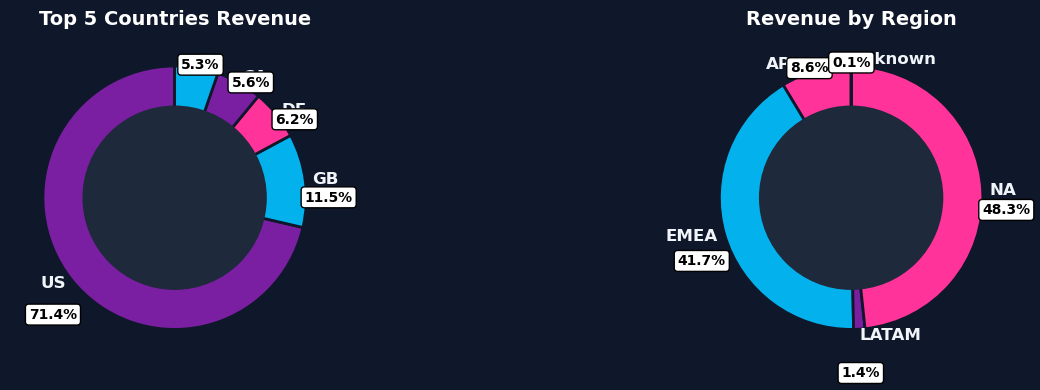

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# 1. DATA
# -------------------------
countries = ['US', 'GB', 'DE', 'CA', 'JP']
country_revenue = [2955813, 475395, 255805, 233775, 220628]

regions = ['APAC', 'EMEA', 'LATAM', 'NA', 'unknown']
region_revenue = [531226.11, 2562575.68, 85841.40, 2968096.26, 3527.04]

# Colors (gradient palette)
colors_countries = ['#7B1FA2', '#03b2ed', '#FF3399', '#7B1FA2', '#03b2ed']
colors_regions = ['#FF3399', '#03b2ed', '#7B1FA2', '#FF3399', '#03b2ed']

# -------------------------
# 2. PLOT
# -------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 4), facecolor='#0f172a')

for ax in axes:
    ax.set_facecolor('#1e293b')

# ------------- COUNTRIES DONUT -------------
wedges_c, label_texts_c = axes[0].pie(
    country_revenue,
    labels=countries,
    startangle=90,
    colors=colors_countries,
    labeldistance=1.05,
    wedgeprops={'edgecolor': '#0f172a', 'linewidth': 2},
    textprops={'fontsize': 12, 'weight': 'bold', 'color': '#f1f5f9'}
)

centre_circle_c = plt.Circle((0,0),0.70,fc='#1e293b')
axes[0].add_artist(centre_circle_c)
axes[0].set_title("Top 5 Countries Revenue", fontsize=14, weight='bold', color='white')

# Add % values below labels
total_c = sum(country_revenue)
for i, w in enumerate(wedges_c):
    pct = country_revenue[i] / total_c * 100
    angle = (w.theta2 + w.theta1) / 2
    x = 1.18 * np.cos(np.deg2rad(angle))
    y = 1.18 * np.sin(np.deg2rad(angle))

    axes[0].text(
        x, y - 0.10,
        f"{pct:.1f}%",
        ha='center', va='top',
        fontsize=10, weight='bold',
        color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.25')
    )

# ------------- REGIONS DONUT -------------
wedges_r, label_texts_r = axes[1].pie(
    region_revenue,
    labels=regions,
    startangle=90,
    colors=colors_regions,
    labeldistance=1.05,
    wedgeprops={'edgecolor': '#0f172a', 'linewidth': 2},
    textprops={'fontsize': 12, 'weight': 'bold', 'color': '#f1f5f9'}
)

centre_circle_r = plt.Circle((0,0),0.70,fc='#1e293b')
axes[1].add_artist(centre_circle_r)
axes[1].set_title("Revenue by Region", fontsize=14, weight='bold', color='white')

# Add % values
total_r = sum(region_revenue)
for i, w in enumerate(wedges_r):
    pct = region_revenue[i] / total_r * 100
    angle = (w.theta2 + w.theta1) / 2
    x = 1.18 * np.cos(np.deg2rad(angle))
    y = 1.18 * np.sin(np.deg2rad(angle))

    axes[1].text(
        x, y - 0.10,
        f"{pct:.1f}%",
        ha='center', va='top',
        fontsize=10, weight='bold',
        color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.25')
    )

# -------------------------
# REDUCE SPACE BETWEEN DONUTS
# -------------------------
plt.subplots_adjust(wspace=0.15)

plt.tight_layout()
plt.show()


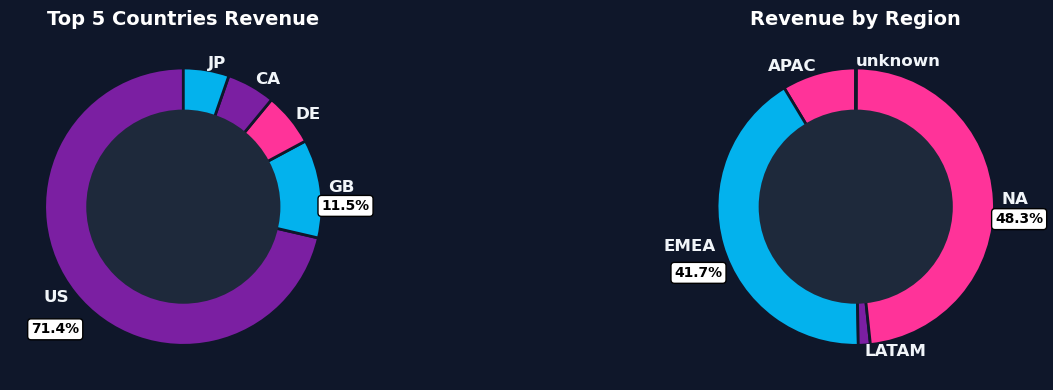

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# 1. DATA
# -------------------------
countries = ['US', 'GB', 'DE', 'CA', 'JP']
country_revenue = [2955813, 475395, 255805, 233775, 220628]

regions = ['APAC', 'EMEA', 'LATAM', 'NA', 'unknown']
region_revenue = [531226.11, 2562575.68, 85841.40, 2968096.26, 3527.04]

# Gradient palette
colors_countries = ['#7B1FA2', '#03b2ed', '#FF3399', '#7B1FA2', '#03b2ed']
colors_regions = ['#FF3399', '#03b2ed', '#7B1FA2', '#FF3399', '#03b2ed']

# -------------------------
# 2. FIGURE
# -------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 4), facecolor='#0f172a')

for ax in axes:
    ax.set_facecolor('#1e293b')

# -------------------------
# 3. COUNTRIES DONUT
# -------------------------
wedges_c, label_texts_c = axes[0].pie(
    country_revenue,
    labels=countries,
    startangle=90,
    colors=colors_countries,
    labeldistance=1.05,
    wedgeprops={'edgecolor': '#0f172a', 'linewidth': 2},
    textprops={'fontsize': 12, 'weight': 'bold', 'color': '#f1f5f9'}
)

centre_circle_c = plt.Circle((0, 0), 0.70, fc='#1e293b')
axes[0].add_artist(centre_circle_c)
axes[0].set_title("Top 5 Countries Revenue", fontsize=14, weight='bold', color='white')

# Label only top 2 countries
total_c = sum(country_revenue)
top2_idx_c = np.argsort(country_revenue)[-2:]

for i in top2_idx_c:
    w = wedges_c[i]
    pct = country_revenue[i] / total_c * 100
    angle = (w.theta2 + w.theta1) / 2
    x = 1.18 * np.cos(np.deg2rad(angle))
    y = 1.18 * np.sin(np.deg2rad(angle))

    axes[0].text(
        x, y - 0.10,
        f"{pct:.1f}%",
        ha='center', va='top',
        fontsize=10, weight='bold',
        color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.25')
    )

# -------------------------
# 4. REGIONS DONUT
# -------------------------
wedges_r, label_texts_r = axes[1].pie(
    region_revenue,
    labels=regions,
    startangle=90,
    colors=colors_regions,
    labeldistance=1.05,
    wedgeprops={'edgecolor': '#0f172a', 'linewidth': 2},
    textprops={'fontsize': 12, 'weight': 'bold', 'color': '#f1f5f9'}
)

centre_circle_r = plt.Circle((0, 0), 0.70, fc='#1e293b')
axes[1].add_artist(centre_circle_r)
axes[1].set_title("Revenue by Region", fontsize=14, weight='bold', color='white')

# Label only top 2 regions
total_r = sum(region_revenue)
top2_idx_r = np.argsort(region_revenue)[-2:]

for i in top2_idx_r:
    w = wedges_r[i]
    pct = region_revenue[i] / total_r * 100
    angle = (w.theta2 + w.theta1) / 2
    x = 1.18 * np.cos(np.deg2rad(angle))
    y = 1.18 * np.sin(np.deg2rad(angle))

    axes[1].text(
        x, y - 0.10,
        f"{pct:.1f}%",
        ha='center', va='top',
        fontsize=10, weight='bold',
        color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.25')
    )

# -------------------------
# 5. SPACING
# -------------------------
plt.subplots_adjust(wspace=0.12)
plt.tight_layout()
plt.show()


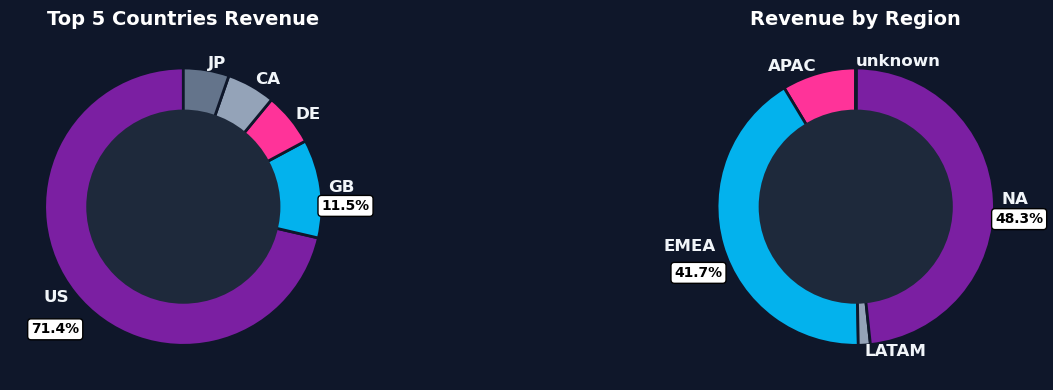

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# 1. DATA
# -------------------------
countries = ['US', 'GB', 'DE', 'CA', 'JP']
country_revenue = [2955813, 475395, 255805, 233775, 220628]

regions = ['APAC', 'EMEA', 'LATAM', 'NA', 'unknown']
region_revenue = [531226.11, 2562575.68, 85841.40, 2968096.26, 3527.04]

# -------------------------
# 2. COLOR PALETTE
# -------------------------
# Gradient for top 3: Purple → Cyan → Pink
top3_colors = ['#7B1FA2', '#03b2ed', '#FF3399']

# Two muted slate colors for the smaller slices
other_colors = ['#94a3b8', '#64748b']

# Sort countries by revenue
sorted_idx_c = np.argsort(country_revenue)[::-1]
colors_countries = [None]*5
for position, idx in enumerate(sorted_idx_c):
    if position < 3:
        colors_countries[idx] = top3_colors[position]
    else:
        colors_countries[idx] = other_colors[position-3]

# Sort regions by revenue
sorted_idx_r = np.argsort(region_revenue)[::-1]
colors_regions = [None]*5
for position, idx in enumerate(sorted_idx_r):
    if position < 3:
        colors_regions[idx] = top3_colors[position]
    else:
        colors_regions[idx] = other_colors[position-3]

# -------------------------
# 3. PLOT
# -------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 4), facecolor='#0f172a')

for ax in axes:
    ax.set_facecolor('#1e293b')

# -------------------------
# COUNTRIES DONUT
# -------------------------
wedges_c, _ = axes[0].pie(
    country_revenue,
    labels=countries,
    startangle=90,
    colors=colors_countries,
    labeldistance=1.05,
    wedgeprops={'edgecolor': '#0f172a', 'linewidth': 2},
    textprops={'fontsize': 12, 'weight': 'bold', 'color': '#f1f5f9'}
)

plt.Circle((0,0),0.70,fc='#1e293b')
axes[0].add_artist(plt.Circle((0,0),0.70,fc='#1e293b'))
axes[0].set_title("Top 5 Countries Revenue", fontsize=14, weight='bold', color='white')

total_c = sum(country_revenue)
top2_idx_c = sorted_idx_c[:2]

for i in top2_idx_c:
    w = wedges_c[i]
    pct = country_revenue[i] / total_c * 100
    angle = (w.theta1 + w.theta2) / 2
    x = 1.18 * np.cos(np.deg2rad(angle))
    y = 1.18 * np.sin(np.deg2rad(angle))

    axes[0].text(
        x, y - 0.10,
        f"{pct:.1f}%",
        ha='center', va='top',
        fontsize=10, weight='bold',
        color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.25')
    )

# -------------------------
# REGIONS DONUT
# -------------------------
wedges_r, _ = axes[1].pie(
    region_revenue,
    labels=regions,
    startangle=90,
    colors=colors_regions,
    labeldistance=1.05,
    wedgeprops={'edgecolor': '#0f172a', 'linewidth': 2},
    textprops={'fontsize': 12, 'weight': 'bold', 'color': '#f1f5f9'}
)

axes[1].add_artist(plt.Circle((0,0),0.70,fc='#1e293b'))
axes[1].set_title("Revenue by Region", fontsize=14, weight='bold', color='white')

total_r = sum(region_revenue)
top2_idx_r = sorted_idx_r[:2]

for i in top2_idx_r:
    w = wedges_r[i]
    pct = region_revenue[i] / total_r * 100
    angle = (w.theta1 + w.theta2) / 2
    x = 1.18 * np.cos(np.deg2rad(angle))
    y = 1.18 * np.sin(np.deg2rad(angle))

    axes[1].text(
        x, y - 0.10,
        f"{pct:.1f}%",
        ha='center', va='top',
        fontsize=10, weight='bold',
        color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.25')
    )

plt.subplots_adjust(wspace=0.12)
plt.tight_layout()
plt.show()


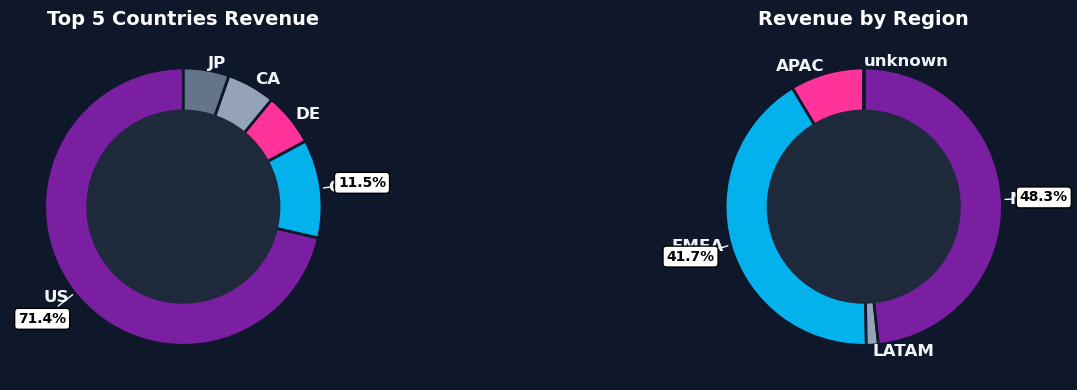

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# 1. DATA
# -------------------------
countries = ['US', 'GB', 'DE', 'CA', 'JP']
country_revenue = [2955813, 475395, 255805, 233775, 220628]

regions = ['APAC', 'EMEA', 'LATAM', 'NA', 'unknown']
region_revenue = [531226.11, 2562575.68, 85841.40, 2968096.26, 3527.04]

# -------------------------
# 2. COLOR PALETTE
# -------------------------
# Gradient for top 3: Purple → Cyan → Pink
top3_colors = ['#7B1FA2', '#03b2ed', '#FF3399']
# Two muted slate colors for the smaller slices
other_colors = ['#94a3b8', '#64748b']

# Sort countries by revenue
sorted_idx_c = np.argsort(country_revenue)[::-1]
colors_countries = [None] * 5
for position, idx in enumerate(sorted_idx_c):
    if position < 3:
        colors_countries[idx] = top3_colors[position]
    else:
        colors_countries[idx] = other_colors[position - 3]

# Sort regions by revenue
sorted_idx_r = np.argsort(region_revenue)[::-1]
colors_regions = [None] * 5
for position, idx in enumerate(sorted_idx_r):
    if position < 3:
        colors_regions[idx] = top3_colors[position]
    else:
        colors_regions[idx] = other_colors[position - 3]

# -------------------------
# 3. PLOT
# -------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 4), facecolor='#0f172a')
for ax in axes:
    ax.set_facecolor('#1e293b')

# -------------------------
# COUNTRIES DONUT
# -------------------------
wedges_c, _ = axes[0].pie(
    country_revenue,
    labels=countries,
    startangle=90,
    colors=colors_countries,
    labeldistance=1.05,
    wedgeprops={'edgecolor': '#0f172a', 'linewidth': 2},
    textprops={'fontsize': 12, 'weight': 'bold', 'color': '#f1f5f9'}
)

axes[0].add_artist(plt.Circle((0, 0), 0.70, fc='#1e293b'))
axes[0].set_title("Top 5 Countries Revenue", fontsize=14, weight='bold', color='white')

total_c = sum(country_revenue)
top2_idx_c = sorted_idx_c[:2]

for i in top2_idx_c:
    w = wedges_c[i]
    pct = country_revenue[i] / total_c * 100
    angle = (w.theta1 + w.theta2) / 2

    # point on the donut edge
    x_edge = np.cos(np.deg2rad(angle))
    y_edge = np.sin(np.deg2rad(angle))

    # point for the label (slightly outside)
    x_label = 1.3 * np.cos(np.deg2rad(angle))
    y_label = 1.3 * np.sin(np.deg2rad(angle))

    axes[0].annotate(
        f"{pct:.1f}%",
        xy=(x_edge, y_edge),          # start of leader line (on wedge)
        xytext=(x_label, y_label),    # label position
        ha='center', va='center',
        fontsize=10, weight='bold', color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.25'),
        arrowprops=dict(arrowstyle='-', color='white', lw=1)
    )

# -------------------------
# REGIONS DONUT
# -------------------------
wedges_r, _ = axes[1].pie(
    region_revenue,
    labels=regions,
    startangle=90,
    colors=colors_regions,
    labeldistance=1.05,
    wedgeprops={'edgecolor': '#0f172a', 'linewidth': 2},
    textprops={'fontsize': 12, 'weight': 'bold', 'color': '#f1f5f9'}
)

axes[1].add_artist(plt.Circle((0, 0), 0.70, fc='#1e293b'))
axes[1].set_title("Revenue by Region", fontsize=14, weight='bold', color='white')

total_r = sum(region_revenue)
top2_idx_r = sorted_idx_r[:2]

for i in top2_idx_r:
    w = wedges_r[i]
    pct = region_revenue[i] / total_r * 100
    angle = (w.theta1 + w.theta2) / 2

    x_edge = np.cos(np.deg2rad(angle))
    y_edge = np.sin(np.deg2rad(angle))

    x_label = 1.3 * np.cos(np.deg2rad(angle))
    y_label = 1.3 * np.sin(np.deg2rad(angle))

    axes[1].annotate(
        f"{pct:.1f}%",
        xy=(x_edge, y_edge),
        xytext=(x_label, y_label),
        ha='center', va='center',
        fontsize=10, weight='bold', color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.25'),
        arrowprops=dict(arrowstyle='-', color='white', lw=1)
    )

plt.subplots_adjust(wspace=0.12)
plt.tight_layout()
plt.show()


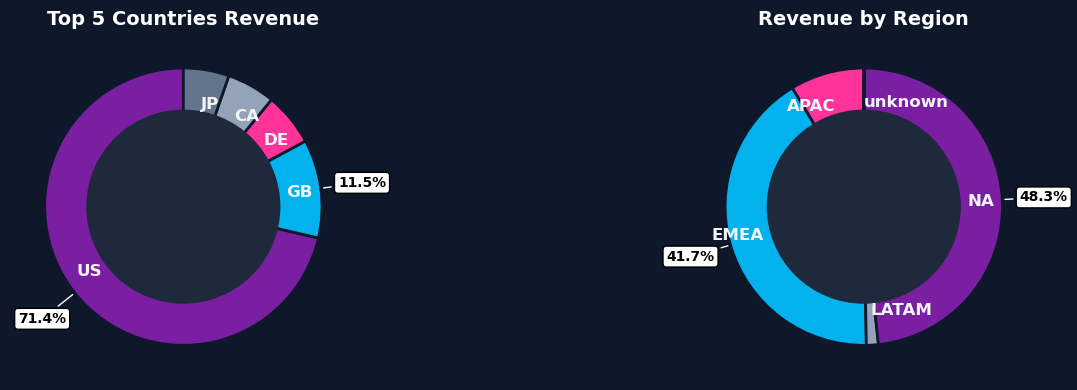

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# 1. DATA
# -------------------------
countries = ['US', 'GB', 'DE', 'CA', 'JP']
country_revenue = [2955813, 475395, 255805, 233775, 220628]

regions = ['APAC', 'EMEA', 'LATAM', 'NA', 'unknown']
region_revenue = [531226.11, 2562575.68, 85841.40, 2968096.26, 3527.04]

# -------------------------
# 2. COLOR PALETTE
# -------------------------
top3_colors = ['#7B1FA2', '#03b2ed', '#FF3399']
other_colors = ['#94a3b8', '#64748b']

sorted_idx_c = np.argsort(country_revenue)[::-1]
colors_countries = [None] * 5
for position, idx in enumerate(sorted_idx_c):
    if position < 3:
        colors_countries[idx] = top3_colors[position]
    else:
        colors_countries[idx] = other_colors[position - 3]

sorted_idx_r = np.argsort(region_revenue)[::-1]
colors_regions = [None] * 5
for position, idx in enumerate(sorted_idx_r):
    if position < 3:
        colors_regions[idx] = top3_colors[position]
    else:
        colors_regions[idx] = other_colors[position - 3]

# -------------------------
# 3. PLOT
# -------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 4), facecolor='#0f172a')
for ax in axes:
    ax.set_facecolor('#1e293b')

# -------------------------
# COUNTRIES DONUT
# -------------------------
wedges_c, _ = axes[0].pie(
    country_revenue,
    labels=countries,
    startangle=90,
    colors=colors_countries,
    labeldistance=0.75,   # moved labels closer to donut
    wedgeprops={'edgecolor': '#0f172a', 'linewidth': 2},
    textprops={'fontsize': 12, 'weight': 'bold', 'color': '#f1f5f9'}
)

axes[0].add_artist(plt.Circle((0, 0), 0.70, fc='#1e293b'))
axes[0].set_title("Top 5 Countries Revenue", fontsize=14, weight='bold', color='white')

total_c = sum(country_revenue)
top2_idx_c = sorted_idx_c[:2]

for i in top2_idx_c:
    w = wedges_c[i]
    pct = country_revenue[i] / total_c * 100
    angle = (w.theta1 + w.theta2) / 2

    x_edge = np.cos(np.deg2rad(angle))
    y_edge = np.sin(np.deg2rad(angle))

    x_label = 1.3 * np.cos(np.deg2rad(angle))
    y_label = 1.3 * np.sin(np.deg2rad(angle))

    axes[0].annotate(
        f"{pct:.1f}%",
        xy=(x_edge, y_edge),
        xytext=(x_label, y_label),
        ha='center', va='center',
        fontsize=10, weight='bold', color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.25'),
        arrowprops=dict(arrowstyle='-', color='white', lw=1)
    )

# -------------------------
# REGIONS DONUT
# -------------------------
wedges_r, _ = axes[1].pie(
    region_revenue,
    labels=regions,
    startangle=90,
    colors=colors_regions,
    labeldistance=0.75,   # moved labels closer to donut
    wedgeprops={'edgecolor': '#0f172a', 'linewidth': 2},
    textprops={'fontsize': 12, 'weight': 'bold', 'color': '#f1f5f9'}
)

axes[1].add_artist(plt.Circle((0, 0), 0.70, fc='#1e293b'))
axes[1].set_title("Revenue by Region", fontsize=14, weight='bold', color='white')

total_r = sum(region_revenue)
top2_idx_r = sorted_idx_r[:2]

for i in top2_idx_r:
    w = wedges_r[i]
    pct = region_revenue[i] / total_r * 100
    angle = (w.theta1 + w.theta2) / 2

    x_edge = np.cos(np.deg2rad(angle))
    y_edge = np.sin(np.deg2rad(angle))

    x_label = 1.3 * np.cos(np.deg2rad(angle))
    y_label = 1.3 * np.sin(np.deg2rad(angle))

    axes[1].annotate(
        f"{pct:.1f}%",
        xy=(x_edge, y_edge),
        xytext=(x_label, y_label),
        ha='center', va='center',
        fontsize=10, weight='bold', color='black',
        bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.25'),
        arrowprops=dict(arrowstyle='-', color='white', lw=1)
    )

plt.subplots_adjust(wspace=0.12)
plt.tight_layout()
plt.show()


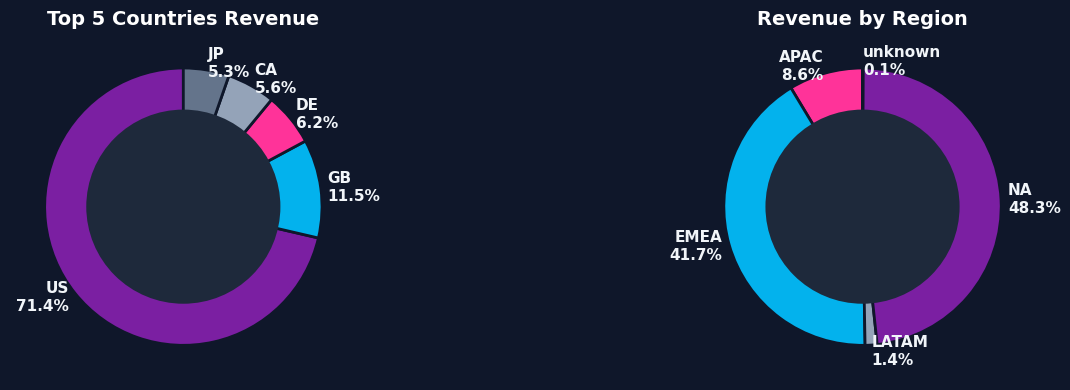

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# 1. DATA
# -------------------------
countries = ['US', 'GB', 'DE', 'CA', 'JP']
country_revenue = [2955813, 475395, 255805, 233775, 220628]

regions = ['APAC', 'EMEA', 'LATAM', 'NA', 'unknown']
region_revenue = [531226.11, 2562575.68, 85841.40, 2968096.26, 3527.04]

# -------------------------
# 2. COLOR PALETTE
# -------------------------
top3_colors = ['#7B1FA2', '#03b2ed', '#FF3399']
other_colors = ['#94a3b8', '#64748b']

sorted_idx_c = np.argsort(country_revenue)[::-1]
colors_countries = [None] * 5
for position, idx in enumerate(sorted_idx_c):
    if position < 3:
        colors_countries[idx] = top3_colors[position]
    else:
        colors_countries[idx] = other_colors[position - 3]

sorted_idx_r = np.argsort(region_revenue)[::-1]
colors_regions = [None] * 5
for position, idx in enumerate(sorted_idx_r):
    if position < 3:
        colors_regions[idx] = top3_colors[position]
    else:
        colors_regions[idx] = other_colors[position - 3]

# -------------------------
# 3. LABELS (Stacked)
# -------------------------
total_c = sum(country_revenue)
country_labels = [
    f"{countries[i]}\n{country_revenue[i]/total_c*100:.1f}%"
    for i in range(len(countries))
]

total_r = sum(region_revenue)
region_labels = [
    f"{regions[i]}\n{region_revenue[i]/total_r*100:.1f}%"
    for i in range(len(regions))
]

# -------------------------
# 4. PLOT
# -------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 4), facecolor='#0f172a')
for ax in axes:
    ax.set_facecolor('#1e293b')

# -------------------------
# COUNTRIES DONUT
# -------------------------
wedges_c, _ = axes[0].pie(
    country_revenue,
    labels=country_labels,
    startangle=90,
    colors=colors_countries,
    labeldistance=1.05,
    wedgeprops={'edgecolor': '#0f172a', 'linewidth': 2},
    textprops={'fontsize': 11, 'weight': 'bold', 'color': '#f1f5f9', 'linespacing': 1.25}
)
axes[0].add_artist(plt.Circle((0, 0), 0.70, fc='#1e293b'))
axes[0].set_title("Top 5 Countries Revenue", fontsize=14, weight='bold', color='white')

# -------------------------
# REGIONS DONUT
# -------------------------
wedges_r, _ = axes[1].pie(
    region_revenue,
    labels=region_labels,
    startangle=90,
    colors=colors_regions,
    labeldistance=1.05,
    wedgeprops={'edgecolor': '#0f172a', 'linewidth': 2},
    textprops={'fontsize': 11, 'weight': 'bold', 'color': '#f1f5f9', 'linespacing': 1.25}
)
axes[1].add_artist(plt.Circle((0, 0), 0.70, fc='#1e293b'))
axes[1].set_title("Revenue by Region", fontsize=14, weight='bold', color='white')

plt.subplots_adjust(wspace=0.12)
plt.tight_layout()
plt.show()


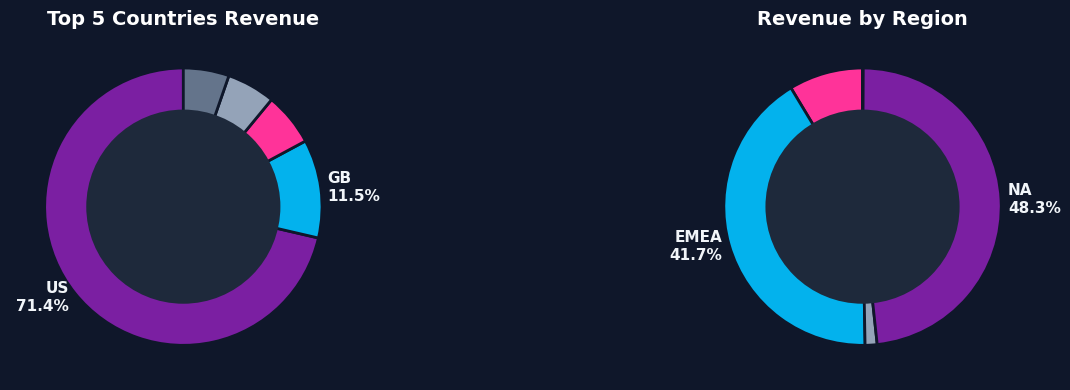

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# 1. DATA
# -------------------------
countries = ['US', 'GB', 'DE', 'CA', 'JP']
country_revenue = [2955813, 475395, 255805, 233775, 220628]

regions = ['APAC', 'EMEA', 'LATAM', 'NA', 'unknown']
region_revenue = [531226.11, 2562575.68, 85841.40, 2968096.26, 3527.04]

# -------------------------
# 2. COLOR PALETTE
# -------------------------
top3_colors = ['#7B1FA2', '#03b2ed', '#FF3399']
other_colors = ['#94a3b8', '#64748b']

sorted_idx_c = np.argsort(country_revenue)[::-1]
colors_countries = [None] * 5
for position, idx in enumerate(sorted_idx_c):
    if position < 3:
        colors_countries[idx] = top3_colors[position]
    else:
        colors_countries[idx] = other_colors[position - 3]

sorted_idx_r = np.argsort(region_revenue)[::-1]
colors_regions = [None] * 5
for position, idx in enumerate(sorted_idx_r):
    if position < 3:
        colors_regions[idx] = top3_colors[position]
    else:
        colors_regions[idx] = other_colors[position - 3]

# -------------------------
# 3. LABELS: Only Highest 2
# -------------------------
total_c = sum(country_revenue)
country_labels = [''] * len(countries)
for i in sorted_idx_c[:2]:
    country_labels[i] = f"{countries[i]}\n{country_revenue[i]/total_c*100:.1f}%"

total_r = sum(region_revenue)
region_labels = [''] * len(regions)
for i in sorted_idx_r[:2]:
    region_labels[i] = f"{regions[i]}\n{region_revenue[i]/total_r*100:.1f}%"

# -------------------------
# 4. PLOT
# -------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 4), facecolor='#0f172a')
for ax in axes:
    ax.set_facecolor('#1e293b')

# -------------------------
# COUNTRIES DONUT
# -------------------------
wedges_c, _ = axes[0].pie(
    country_revenue,
    labels=country_labels,
    startangle=90,
    colors=colors_countries,
    labeldistance=1.05,
    wedgeprops={'edgecolor': '#0f172a', 'linewidth': 2},
    textprops={'fontsize': 11, 'weight': 'bold', 'color': '#f1f5f9', 'linespacing': 1.25}
)
axes[0].add_artist(plt.Circle((0, 0), 0.70, fc='#1e293b'))
axes[0].set_title("Top 5 Countries Revenue", fontsize=14, weight='bold', color='white')

# -------------------------
# REGIONS DONUT
# -------------------------
wedges_r, _ = axes[1].pie(
    region_revenue,
    labels=region_labels,
    startangle=90,
    colors=colors_regions,
    labeldistance=1.05,
    wedgeprops={'edgecolor': '#0f172a', 'linewidth': 2},
    textprops={'fontsize': 11, 'weight': 'bold', 'color': '#f1f5f9', 'linespacing': 1.25}
)
axes[1].add_artist(plt.Circle((0, 0), 0.70, fc='#1e293b'))
axes[1].set_title("Revenue by Region", fontsize=14, weight='bold', color='white')

plt.subplots_adjust(wspace=0.12)
plt.tight_layout()
plt.show()


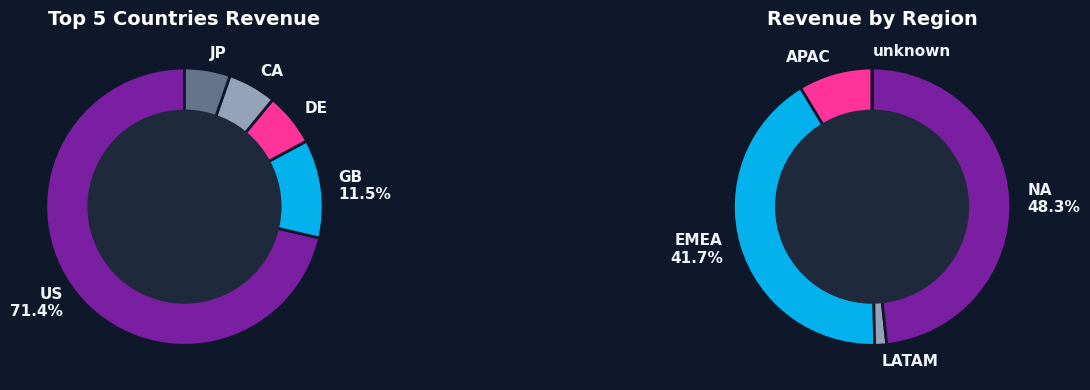

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# 1. DATA
# -------------------------
countries = ['US', 'GB', 'DE', 'CA', 'JP']
country_revenue = [2955813, 475395, 255805, 233775, 220628]

regions = ['APAC', 'EMEA', 'LATAM', 'NA', 'unknown']
region_revenue = [531226.11, 2562575.68, 85841.40, 2968096.26, 3527.04]

# -------------------------
# 2. COLOR PALETTE
# -------------------------
top3_colors = ['#7B1FA2', '#03b2ed', '#FF3399']
other_colors = ['#94a3b8', '#64748b']

# COLOR MAPPING FOR COUNTRIES
sorted_idx_c = np.argsort(country_revenue)[::-1]
colors_countries = [None] * len(countries)
for pos, idx in enumerate(sorted_idx_c):
    colors_countries[idx] = top3_colors[pos] if pos < 3 else other_colors[pos - 3]

# COLOR MAPPING FOR REGIONS
sorted_idx_r = np.argsort(region_revenue)[::-1]
colors_regions = [None] * len(regions)
for pos, idx in enumerate(sorted_idx_r):
    colors_regions[idx] = top3_colors[pos] if pos < 3 else other_colors[pos - 3]

# -------------------------
# 3. LABELS
# -------------------------
# Label ALL names (country/region)
country_labels = countries.copy()
region_labels = regions.copy()

# Add % ONLY for highest 2
total_c = sum(country_revenue)
for i in sorted_idx_c[:2]:
    country_labels[i] = f"{countries[i]}\n{country_revenue[i]/total_c*100:.1f}%"

total_r = sum(region_revenue)
for i in sorted_idx_r[:2]:
    region_labels[i] = f"{regions[i]}\n{region_revenue[i]/total_r*100:.1f}%"

# -------------------------
# 4. PLOT SETUP
# -------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 4), facecolor='#0f172a')
for ax in axes:
    ax.set_facecolor('#1e293b')

# -------------------------
# 5. COUNTRIES DONUT CHART
# -------------------------
wedges_c, _ = axes[0].pie(
    country_revenue,
    labels=country_labels,
    startangle=90,
    colors=colors_countries,
    labeldistance=1.12,
    wedgeprops={'edgecolor': '#0f172a', 'linewidth': 2},
    textprops={'fontsize': 11, 'color': '#f1f5f9', 'weight': 'bold'}
)
axes[0].add_artist(plt.Circle((0, 0), 0.70, fc='#1e293b'))
axes[0].set_title("Top 5 Countries Revenue", fontsize=14, color='white', weight='bold')

# -------------------------
# 6. REGIONS DONUT CHART
# -------------------------
wedges_r, _ = axes[1].pie(
    region_revenue,
    labels=region_labels,
    startangle=90,
    colors=colors_regions,
    labeldistance=1.12,
    wedgeprops={'edgecolor': '#0f172a', 'linewidth': 2},
    textprops={'fontsize': 11, 'color': '#f1f5f9', 'weight': 'bold'}
)
axes[1].add_artist(plt.Circle((0, 0), 0.70, fc='#1e293b'))
axes[1].set_title("Revenue by Region", fontsize=14, color='white', weight='bold')

plt.subplots_adjust(wspace=0.12)
plt.tight_layout()
plt.show()
